## Classifying Newswires: Single-Label Multiclass Classification

This example focuses on classifying news articles into 46 distinct topics using the Reuters dataset. Each article belongs to a single category out of 46 available topics. 

- The `num_words` parameter limits the vocabulary to the most frequent 10,000 words, streamlining data dimensionality.

Through training a machine learning model on the labeled training data, the model learns textual patterns that correspond to different topics. This enables the model to predict topics for new, unseen articles.

Balancing model complexity and regularization is vital to effectively categorize the diverse range of topics. This example illustrates the practical use of machine learning to classify textual data, demonstrating its utility for various applications.

In [4]:
from tensorflow.keras.datasets import reuters
(test_data, test_labels), (train_data, train_labels) = reuters.load_data(num_words=10000)


2110848/2110848 [==============================] - 1s 0us/step


## Decoding Text Data

1. Retrieves the `word_index` dictionary from the Reuters dataset.
2. Constructs a `reverse_word_index` dictionary, inverting keys and values from the `word_index`.
3. Decodes a newswire from the training data, translating encoded word indices back into words using the `reverse_word_index`.
4. Reconstructs the original content of the newswire by joining the words together.

This process is essential for translating numerical sequences into human-readable text, aiding in data interpretation and readability.

In [5]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## Vectorizing Sequences

1. Define the `vectorize_sequences` function, which takes sequences and an optional `dimension` parameter as inputs.
2. Create an array named `results` with zeros, where the number of rows corresponds to the length of the input sequences, and the number of columns is determined by the specified dimension.
3. Iterate through the sequences, and for each sequence, set the corresponding indices in the `results` array to 1, effectively indicating the presence of certain elements.
4. Return the resulting array.

The code demonstrates a method to convert sequences into a numerical format, making them compatible with machine learning algorithms. The `x_train` and `x_test` arrays contain binary values that indicate the presence or absence of specific elements from the vocabulary in each sequence. This vectorization process prepares textual data for machine learning model input.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

## One-Hot Encoding for Multi-Class Classification

In multi-class classification, one-hot encoding is used to convert categorical labels into binary vectors. Each label is represented as a vector where all elements are 0 except for the index corresponding to the label, which is set to 1.

The provided code snippet demonstrates the implementation of one-hot encoding using the `to_one_hot` function. The process involves:

1. Defining the `to_one_hot` function that takes labels and an optional `dimension` parameter as inputs.
2. Creating an array named `results` with zeros, where the number of rows corresponds to the length of the input labels, and the number of columns is determined by the specified dimension.
3. Iterating through the labels, and for each label, setting the corresponding index in the `results` array to 1.
4. Returning the resulting binary vector representation.

The `y_train` and `y_test` arrays contain binary vectors that represent the categorical labels in the training and testing datasets, respectively. This encoding format is suitable for training multi-class classification models that require numerical labels.

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)

y_test = to_one_hot(test_labels)

## Model Architecture

The defined neural network model follows a sequential structure, consisting of several layers that progressively process the input data. This architecture is designed for multi-class classification, specifically for categorizing news articles into one of 46 distinct topics.

- **Input Layer:** The model starts with an input layer that takes in the vectorized input data.

- **Hidden Layers (Dense):** Two hidden layers with 64 units each employ the ReLU (Rectified Linear Unit) activation function. ReLU facilitates nonlinear transformations, enabling the model to capture complex patterns within the data.

- **Output Layer:** The final layer contains 46 units, representing the 46 different classes (news topics) present in the dataset. The activation function used is softmax, which produces a probability distribution across the classes. This distribution helps in classifying input instances into one of the 46 topics.

This architecture's progressive nature, from input to hidden to output layers, enables the model to learn hierarchical representations of the data, ultimately leading to accurate multi-class classification of news articles.

In [39]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

## Model Compilation

To train the neural network model, it needs to be configured with the appropriate optimization algorithm, loss function, and evaluation metrics.

- **Optimizer (RMSprop):** The RMSprop optimizer is chosen for gradient-based optimization. It adjusts the learning rate for each parameter separately, which can help speed up convergence and improve training.

- **Loss Function (Categorical Cross-Entropy):** Since this is a multi-class classification problem, categorical cross-entropy is selected as the loss function. It measures the difference between the predicted probability distribution and the true distribution of class labels.

- **Metrics (Accuracy):** Accuracy is used as a metric to evaluate the model's performance during training. It measures the proportion of correctly classified instances out of the total instances.

Configuring the model with these settings prepares it for training on the Reuters dataset, enabling it to learn and improve its ability to classify news articles into the 46 different topics accurately.

In [40]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Data Splitting

To assess the model's performance during training and prevent overfitting, the training data is further split into a validation set and a partial training set.

- **Validation Data (x_val, y_val):** The first 1000 samples from the training data are set aside for validation. This data is used to monitor the model's performance on unseen examples during each epoch and helps to detect overfitting.

- **Partial Training Data (partial_x_train, partial_y_train):** The remaining training samples (after the validation data) are used as the partial training set. This data is used to train the model in each epoch, allowing it to learn from a diverse set of examples.

By using this data splitting strategy, the model's ability to generalize to new data is enhanced, and the risk of overfitting is minimized. The validation set assists in monitoring the model's progress, ensuring that it performs well on unseen data.

In [41]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Model Training

The model is trained using the partial training data and monitored using the validation data. The following training parameters are used:

- **Number of Epochs:** 20 epochs
- **Batch Size:** 512

The training process involves iteratively updating the model's weights to minimize the categorical cross-entropy loss. The loss and accuracy metrics are recorded for both the training and validation data in each epoch. This allows for tracking the model's performance on both datasets over the training period.

Training the model with multiple epochs allows it to progressively learn patterns and relationships in the data. The validation data helps identify any signs of overfitting and provides insights into the model's generalization capabilities.

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
3/3 [==============================] - 1s 186ms/step - loss: 3.6941 - accuracy: 0.2520 - val_loss: 3.2761 - val_accuracy: 0.4340
Epoch 2/20
3/3 [==============================] - 0s 59ms/step - loss: 3.1045 - accuracy: 0.4735 - val_loss: 2.7946 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 72ms/step - loss: 2.5904 - accuracy: 0.5610 - val_loss: 2.4258 - val_accuracy: 0.5620
Epoch 4/20
3/3 [==============================] - 0s 80ms/step - loss: 2.1742 - accuracy: 0.6011 - val_loss: 2.1285 - val_accuracy: 0.6090
Epoch 5/20
3/3 [==============================] - 0s 72ms/step - loss: 1.8359 - accuracy: 0.6693 - val_loss: 1.9332 - val_accuracy: 0.6030
Epoch 6/20
3/3 [==============================] - 0s 78ms/step - loss: 1.5861 - accuracy: 0.6854 - val_loss: 1.7954 - val_accuracy: 0.6360
Epoch 7/20
3/3 [==============================] - 0s 73ms/step - loss: 1.4011 - accuracy: 0.7143 - val_loss: 1.6870 - val_accuracy: 0.6520
Epoch 8/20
3/3 [==========

## Loss Visualization

A plot of the training and validation loss is generated to visualize the model's performance during training. The x-axis represents the number of epochs, while the y-axis represents the loss values.

- The blue dots indicate the training loss at each epoch.
- The solid blue line represents the validation loss at each epoch.

This visualization provides insights into how the model's loss changes over time during both training and validation. Ideally, we would want to see a decreasing trend in both training and validation loss. If the validation loss starts to increase while the training loss keeps decreasing, it could indicate overfitting, where the model is becoming too specialized to the training data.

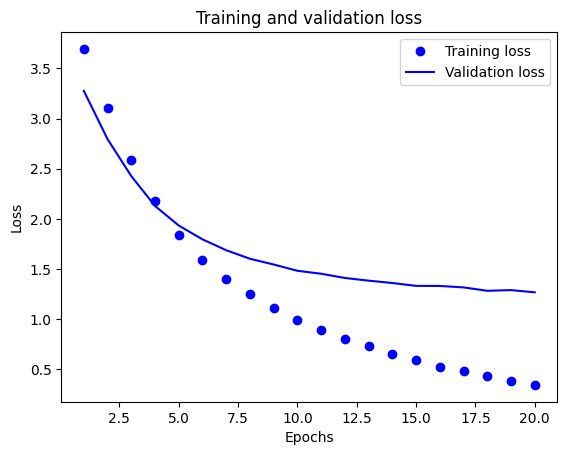

In [43]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Accuracy Visualization

This plot visualizes the training and validation accuracy over epochs. The x-axis represents the number of epochs, while the y-axis represents the accuracy values.

- The blue dots indicate the training accuracy at each epoch.
- The solid blue line represents the validation accuracy at each epoch.

The goal of training is to achieve increasing accuracy values for both training and validation datasets. However, if the training accuracy continues to increase while the validation accuracy stagnates or decreases, it may suggest overfitting. On the other hand, a low training accuracy and high validation accuracy could indicate underfitting. This visualization helps monitor the model's ability to generalize well to new data.

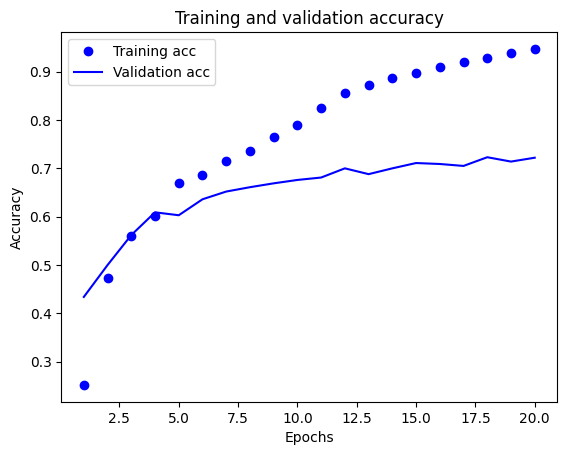

In [44]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Conclusions

When performing classification tasks with multiple classes, keep the following points in mind:

1. **Output Layer Configuration**: In the case of classifying data points among N classes, your model's last dense layer should have N units. This design allows the model to produce a probability distribution over all classes.

2. **Activation Function**: For single-label multiclass classification, the activation function in the last layer should be softmax. Softmax converts the output values into probabilities, making it easier to interpret the model's predictions.

3. **Loss Function Choice**: Categorical cross-entropy is a widely used loss function for such multiclass classification tasks. It quantifies the difference between predicted and actual class distributions, facilitating efficient model training.

4. **Model Generalization**: Avoid creating information bottlenecks by ensuring that intermediate layers in your model aren't too small. Such bottlenecks can limit the model's capacity to learn and hinder its ability to generalize well to new data.

By following these principles, you can design effective and accurate models for single-label multiclass classification problems, leading to better classification results and improved model performance.